In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Weather_BTS.csv',index_col=0)
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'DEP_TIME',
       'DEP_DELAY', 'DATE', 'STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09'],
      dtype='object')

In [3]:
df=df[df['DEP_DELAY'].notna()]
df=df[['DEP_DELAY','OP_UNIQUE_CARRIER']]

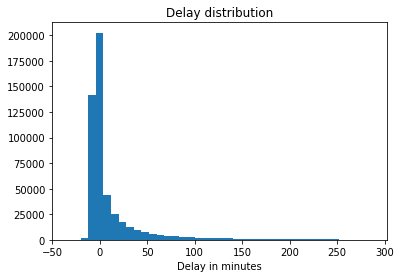

In [5]:
a=np.sort(df['DEP_DELAY'])
temp=a[:503000]
binwidth=8
plt.hist(temp,bins=range(int(min(temp)),int(max(temp))+binwidth,binwidth))
#plt.yscale('log', nonposy='clip')
plt.xlabel('Delay in minutes')
plt.title('Delay distribution')
plt.xlim(-50)
plt.show()

In [6]:

df=df[df['DEP_DELAY']>=-20]
df=df[ df['DEP_DELAY']<200]

In [7]:
delay=[]
for i,j in df['DEP_DELAY'].iteritems():
    if(j>15):
        delay.append(1)
    else:
        delay.append(0)

In [8]:
df['DEP_DELAY']=delay


In [9]:
b=df['OP_UNIQUE_CARRIER'].unique()
b

array(['DL', 'AS', 'AA', 'HA', 'VX', 'B6', 'MQ', 'OH', 'YX', '9E', 'OO',
       'EV', 'UA', 'US'], dtype=object)

In [10]:
d={}
for i in b:
    a=df[df['OP_UNIQUE_CARRIER']==i]
    summ=a['DEP_DELAY'].sum()
    d[i]=summ
    
    

In [11]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d=np.array(sorted_d)
sorted_d[:,0]

array(['OH', 'OO', 'HA', 'YX', 'AS', 'EV', 'US', 'UA', 'VX', 'MQ', '9E',
       'AA', 'DL', 'B6'], dtype='<U5')

Text(0.5, 1.0, 'Delay distribution by carrier')

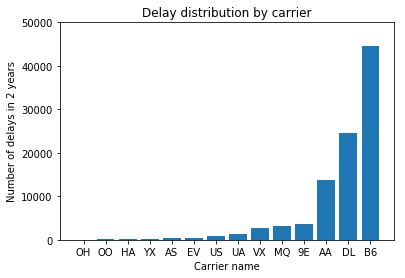

In [14]:
plt.bar(sorted_d[:,0],(sorted_d[:,1]).astype(int))
plt.ylim(bottom=0,top=50000)
plt.xlabel('Carrier name')
plt.ylabel('Number of delays in 2 years')
plt.title('Delay distribution by carrier')